<a href="https://colab.research.google.com/github/MohamedDiakhate/Machine-Learning-Data-Science-Projects/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The primary goal of this analysis is to uncover the key factors that influence Airbnb pricing and demand across New York City, with the ultimate aim of predicting profitability and identifying high-potential, investment-worthy listings.

To achieve this, we will explore the spatial distribution of listings, examining how location density correlates with price and availability. Additionally, we will enrich our analysis by integrating external datasets on weather conditions and crime rates, allowing us to assess how environmental and safety-related factors impact Airbnb performance. This multi-dimensional approach will be conducted using publicly available datasets from Airbnb, NYC complaint reports, and local weather data.

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Data Loading and Preprocessing





The data we will be using for this project is the **Airbnb Open Data** and is being downloaded from google.

The following cells are responsible to download the data and make it accessible for our analysis.



In [ ]:
%%capture
!apt update
!pip install kaggle

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!kaggle datasets download -d arianazmoudeh/airbnbopendata
!kaggle datasets download -d alejopaullier/new-york-city-weather-data-2019
!kaggle datasets download -d mihalw28/nypd-complaint-data-current-ytd-july-2018

Dataset URL: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata
License(s): ODbL-1.0
airbnbopendata.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/alejopaullier/new-york-city-weather-data-2019
License(s): CC0-1.0
new-york-city-weather-data-2019.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/mihalw28/nypd-complaint-data-current-ytd-july-2018
License(s): unknown
nypd-complaint-data-current-ytd-july-2018.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip folder in Colab content folder
!unzip /content/airbnbopendata.zip
!unzip /content/new-york-city-weather-data-2019.zip
!unzip /content/nypd-complaint-data-current-ytd-july-2018.zip

Archive:  /content/airbnbopendata.zip
replace Airbnb_Open_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/new-york-city-weather-data-2019.zip
replace nyc_temperature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/nypd-complaint-data-current-ytd-july-2018.zip
replace NYPDIncidentLevelDataFootnotes.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## AirBnB Dataset

### Read Data

The format that will be used in this project in this *csv* format. The data will be stored in a variable named AB_df

In [ ]:
AB_df = pd.read_csv('Airbnb_Open_Data.csv')

<ipython-input-235-b55713c82463>:1: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
AB_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Data Cleaning

#### Handling Null Values

In [ ]:
num_null = AB_df.isnull().sum()
num_null

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


We will look at the percentage of null values for each column as numbers may not give enough information to actually visualize the ratio of missing data with available data.

In [ ]:
(round(AB_df.isnull().sum() / AB_df.shape[0] * 100, 2)).sort_values(ascending=False)

,0
license,100.00
house_rules,50.81
last review,15.49
reviews per month,15.48
country,0.52
availability 365,0.44
minimum nights,0.40
host name,0.40
review rate number,0.32
calculated host listings count,0.31


Notice some columns such as license and house_rules do have a considerable percentage of null values. However these columns will be dropped as we will not need them for our analysis.


In [ ]:
#Drop license and house_rules
AB_df.drop(['license','house_rules'],axis= 1, inplace=True)
AB_df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


In addition, the **country** column is supposed to only composed of United States, hence the null values in that column should be disregarded.

Before dropping it let us verify that the dataset only contains information about the United States by checking the components of the **neighborhood group** column.

In [ ]:
AB_df['country'].value_counts()

,count
country,
United States,102067


In [ ]:
AB_df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


We can then drop the **country** column as well

In [ ]:
AB_df.drop(['country'],axis=1,inplace=True)

let us review the ratio of missing values in the dataset before proceeding to remove the null values

In [ ]:
(round(AB_df.isnull().sum() / AB_df.shape[0] * 100, 2)).sort_values(ascending=False)

,0
last review,15.49
reviews per month,15.48
availability 365,0.44
minimum nights,0.40
host name,0.40
review rate number,0.32
calculated host listings count,0.31
host_identity_verified,0.28
service fee,0.27
NAME,0.24


We will now drop the null values

In [ ]:
AB_df.dropna(inplace=True)

#### Handling Duplicates

In [ ]:
dup_num = AB_df.duplicated().sum()
print(f"This dataset contains {dup_num} duplicated values")

This dataset contains 466 duplicated values


We will drop these duplicates as well before exploring the data

In [ ]:
#Drop duplicates
AB_df.drop_duplicates(inplace=True)
dup_num = AB_df.duplicated().sum()
print(f"This dataset now contains {dup_num} duplicated values")

This dataset now contains 0 duplicated values


## NYC Weather Dataset

### Read Data

In [ ]:
weather_df = pd.read_csv('nyc_temperature.csv')
weather_df.head()

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,1/1/19,60,40,50.0,13.9,15,0,0.08,0,0
1,2/1/19,41,35,38.0,2.1,27,0,0,0,0
2,3/1/19,45,39,42.0,6.3,23,0,T,0,0
3,4/1/19,47,37,42.0,6.5,23,0,0,0,0
4,5/1/19,47,42,44.5,9.1,20,0,0.45,0,0


### Data Cleaning

#### Handling Null Values

In [ ]:
weather_df.isnull().sum()

,0
date,0
tmax,0
tmin,0
tavg,0
departure,0
HDD,0
CDD,0
precipitation,0
new_snow,0
snow_depth,0


This dataset does not contain any null values. No further processing needed regarding missing values

#### Handling Duplicates

In [ ]:
weather_df.duplicated().sum()

np.int64(0)

Nor does it contain any duplicated values

## NYD Complaint Data

Notice that we are using the 2018 incidents because customers do look at historical events before booking their places. Therefore we thought it would more accurate to use recent historical data instead of information in the same year

### Read Data

In [ ]:
complaint_df = pd.read_csv("NYPD_Complaint_Data_Current_YTD.csv")
complaint_df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,831526991,67,BROOKLYN,03/31/2018,23:30:00,03/31/2018,23:37:00,COMPLETED,NaN,NaN,...,NaN,NaN,UNKNOWN,UNKNOWN,E,1003227.0,177460.0,40.653751,-73.931609,"(40.653751263, -73.931609227)"
1,496736340,120,STATEN ISLAND,03/31/2018,23:20:00,03/31/2018,23:30:00,COMPLETED,RICHMOND TERRACE,10143.0,...,M,NaN,<18,BLACK,F,962748.0,174174.0,40.644726,-74.077483,"(40.644726131, -74.077483159)"
2,399593692,105,QUEENS,03/31/2018,23:15:00,03/31/2018,23:20:00,COMPLETED,NaN,NaN,...,M,NaN,18-24,BLACK,F,1056932.0,200034.0,40.715434,-73.737816,"(40.715433534, -73.737816163)"
3,282376455,110,QUEENS,03/31/2018,23:10:00,03/31/2018,23:20:00,COMPLETED,NaN,NaN,...,M,NaN,25-44,WHITE HISPANIC,M,1014990.0,210503.0,40.744414,-73.889065,"(40.744413503, -73.889065158)"
4,201598299,78,BROOKLYN,03/31/2018,23:10:00,03/31/2018,23:19:00,COMPLETED,572 WARREN STREET,2379.0,...,F,NaN,25-44,BLACK,F,989141.0,187733.0,40.681967,-73.982367,"(40.681967344, -73.982367054)"


We also have downloaded the description of the dataset, so we will populate it in order to better understand the column names.

In [ ]:
complaint_desc_df = pd.read_csv("NYPD_Incident_Level_Data_Column_Descriptions.csv")
complaint_desc_df

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


### Data Cleaning

Before analysing the null values, we will drop some useless columns for our analysis.

For our analysis the only relevant information we would like to extract from this dataset are information related to the locations of the incidents and the their time. As a result every other column would be dropped.

The columns of interest are the following:

*   CMPLNT_FR_DT : Exact date of occurrence for the reported event
*   BORO_NM     : Borough name
*   Latitude    : Latitude coordinate
*   Longitude   : Longitude coordinate



In [ ]:
complaint_df = complaint_df[['CMPLNT_FR_DT','BORO_NM','Latitude','Longitude']]
complaint_df.head()

,CMPLNT_FR_DT,BORO_NM,Latitude,Longitude
0,03/31/2018,BROOKLYN,40.653751,-73.931609
1,03/31/2018,STATEN ISLAND,40.644726,-74.077483
2,03/31/2018,QUEENS,40.715434,-73.737816
3,03/31/2018,QUEENS,40.744414,-73.889065
4,03/31/2018,BROOKLYN,40.681967,-73.982367


#### Handling Null Values

In [ ]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109543 entries, 0 to 109542
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CMPLNT_FR_DT  109543 non-null  object 
 1   BORO_NM       109485 non-null  object 
 2   Latitude      109541 non-null  float64
 3   Longitude     109541 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.3+ MB


Our data contains 109543 rows and 4 columns. Let us look at the null values

In [ ]:
complaint_df.isnull().sum()

,0
CMPLNT_FR_DT,0
BORO_NM,58
Latitude,2
Longitude,2


The numer of null values recorded seems insignificant, it is safe to drop rows with null values. Let us do that

In [ ]:
complaint_df.dropna(inplace=True)
complaint_df.isnull().sum()

,0
CMPLNT_FR_DT,0
BORO_NM,0
Latitude,0
Longitude,0


Let us now look at the duplicated values

#### Handling Duplicates

In [ ]:
complaint_df.duplicated().sum()

np.int64(10055)

In [ ]:
#drop duplicates
complaint_df.drop_duplicates(inplace=True)
complaint_df.duplicated().sum()

np.int64(0)

# Exploratory Data Analyis & Feature Engineering

## AirBnB EDA

### Understanding the data

In this section we’ll **get to know our dataset** by:

1. **Previewing** the first few rows with `df.head()`  
2. **Checking** the datatypes of the different columns
3. **Checking** its overall size and structure with `df.shape` and `df.info()`  
5. **Summarizing** key statistics via `df.describe()`  
4. **Identifying** missing values and duplicates


In [ ]:
#output the first 5 rows of the data
AB_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country code,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,US,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,US,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,US,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,US,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,US,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [ ]:
AB_df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.382400e+04,8.382400e+04,83824.000000,83824.000000,83824.000000,83824.000000,83824.000000,83824.000000,83824.000000,83824.000000,83824.000000
mean,2.962506e+07,4.918775e+10,40.727358,-73.948518,2012.487128,7.417685,32.258649,1.376551,3.279634,7.035205,141.807287
std,1.621682e+07,2.852968e+10,0.056338,0.050334,5.761586,28.050832,51.912200,1.749094,1.283238,29.520707,133.909677
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.546207e+07,2.445426e+10,40.687650,-73.982120,2007.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,3.085343e+07,4.902984e+10,40.721330,-73.953720,2012.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,4.334355e+07,7.384675e+10,40.762613,-73.930830,2017.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
#Get the dimensions of the dataset
AB_df.shape

(83824, 23)

In [ ]:
AB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83824 entries, 0 to 102040
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83824 non-null  int64  
 1   NAME                            83824 non-null  object 
 2   host id                         83824 non-null  int64  
 3   host_identity_verified          83824 non-null  object 
 4   host name                       83824 non-null  object 
 5   neighbourhood group             83824 non-null  object 
 6   neighbourhood                   83824 non-null  object 
 7   lat                             83824 non-null  float64
 8   long                            83824 non-null  float64
 9   country code                    83824 non-null  object 
 10  instant_bookable                83824 non-null  object 
 11  cancellation_policy             83824 non-null  object 
 12  room type                       8382

As shown above our dataset is composed of 102599 rows and 25 columns.

We notice that the columns **price** and **service fee** are in non-numeric types. They will need to be converted into numerical values before we start the analysis.
The reason might be that they contain currency sign, let's verify them.

We notice that some features such as price and service fee are of type object while these should be numerical. The reason might be that theycontain currency sign, let's verify them.

We will remove the dollar sign for these 2 columns and convert the types to float as we would need them numerical for plotting and further analysis

In [ ]:
AB_df['price'] = AB_df['price'].str.replace('$','').str.replace(',','').astype(float)
AB_df['service fee'] = AB_df['service fee'].str.replace('$','').str.replace(',','').astype(float)

In [ ]:
AB_df[['price','service fee']].dtypes

,0
price,float64
service fee,float64


In [ ]:
AB_df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Brooklyn,34795
Manhattan,34750
Queens,11172
Bronx,2283
Staten Island,823
brookln,1


As shown the dataset indeed only contains information about New York City as the neighbourhood group column shows the NYC boroughs.

We notice that the last two rows seem to be mispelled as they seem to correspond to respectively *Brooklyn* and *Manhattan*.

We will correct the spelling mistake even though it only affects 2 observations which is relativley not significant overall

In [ ]:
AB_df['neighbourhood group'] = AB_df['neighbourhood group'].replace(['brookln','manhatan'],['Brooklyn','Manhattan'])

In [ ]:
AB_df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Brooklyn,34796
Manhattan,34750
Queens,11172
Bronx,2283
Staten Island,823


### Data Visualization

Let's now do some visualization in order to get a better sense of our data.

Let's look at the distribution of the prices across the dataset in

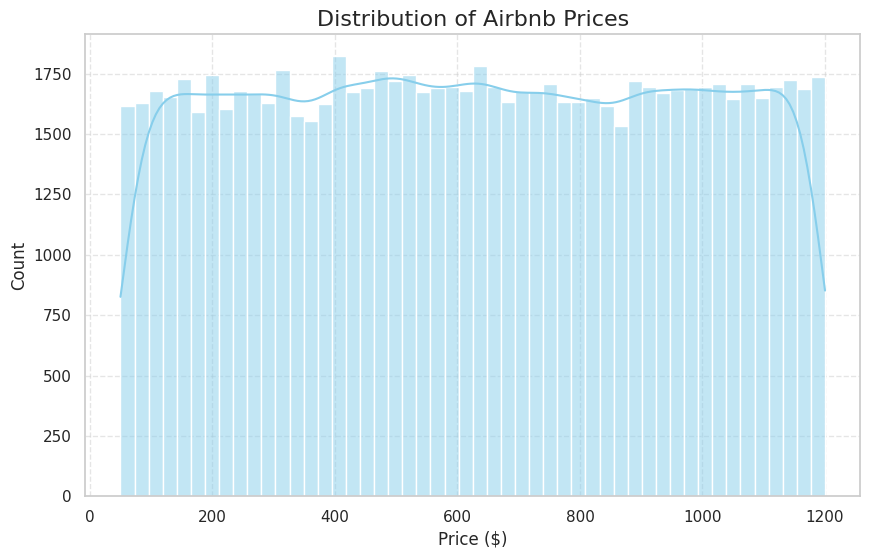

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=AB_df, x='price', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Airbnb Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


The distribution of prices appears relatively uniform with a slight right skew.

Most listings fall within a moderate price range, suggesting that extreme outliers (very expensive listings) are rare.

This balanced distribution is beneficial for predictive modeling, as it reduces the need for heavy resampling or transformation.

Depending on model performance later, we may consider applying log transformation to reduce skewness if needed.

In [ ]:
# Step 1: Clean price column if you haven't already
AB_df['price'] = AB_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Step 2: Group by neighbourhood group and neighbourhood to get average price
avg_price_df = AB_df.groupby(['neighbourhood group', 'neighbourhood'], as_index=False)['price'].mean()
avg_price_df.rename(columns={'price': 'avg_price'}, inplace=True)

# Step 3: Create the treemap
fig = px.treemap(
    avg_price_df,
    path=['neighbourhood group', 'neighbourhood'],
    values='avg_price',
    color='avg_price',
    color_continuous_scale='RdBu',
    title='Average Airbnb Price by Neighbourhood Group and Neighbourhood'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

🏙️ Manhattan and Brooklyn has approximatively the same average prices accross their neighbours, showing uniformity with prices averaging between 600-700

Neighborhoods like Chelsea, West Village, and Midtown also show elevated pricing, indicating strong potential for high ROI if occupancy is steady.

🌉 Queens and Bronx presents a wider range with Little Neck and Jamaica hills having a relatively high average 800-900 comoared to areas like Breezy Point with an average of $300.


🏡  Staten Island on the hand has a vast range of prices, from Woodrow with an average of around 80 to New Dorp and Chelsea averaging 1000.

It contains the lowest priced listings, ideal for travelers seeking affordability and also the highest averages within the borough, making them standouts for strategic investment.


The discrepancy noted in Staten Island particularly can have multiple reasons. One of being a lack of data for this borough. To verify that we will see the distribution of the listings, ie the density of the listings across NYC

Let us now plot the Geo-distribution of the listings in order to visualize the part of the city with the highest listing-density

In [ ]:
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Sample subset to avoid overplotting
sample_df = AB_df.sample(20000)

for idx, row in sample_df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color='green',
                        fill=True,
                        fill_opacity=0.5).add_to(map_nyc)
map_nyc


Indeed the map shows that Boroughs like Brooklyn and Manhattan have the most listings in the dataset, potentially explaining the uniformity of the average price in those areas.

Staten Islan on the other hand only has few listings and this could be one of the reason of the wide range of its listing prices.

We will deal with this unbalance later in our analysis.

Let us now look at the price according to different types of room.

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Violin plot for price distribution by room type
sns.violinplot(data=AB_df[AB_df['price']>0], x='room type', y='price', palette='viridis', inner='quartile')

plt.title('Price Distribution by Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, which="major", linestyle='--', linewidth=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

We notice that the price range and approximately the same accross different room types with a slightly wider range in shared rooms.

Hotel rooms have the wider range of prices across all rooms, however conclusion cannot be derived immediately because service fees could be higher.

leading us to verify service fees across room types

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Violin plot for price distribution by room type
sns.violinplot(data=AB_df[AB_df['service fee']>0], x='room type', y='service fee', palette='viridis', inner='quartile')

plt.title('Service fee by Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Service fee', fontsize=12)
plt.grid(True, which="major", linestyle='--', linewidth=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Service fee do follow price range.

In [ ]:
AB_df.info()

One of the most important determinant of reliability when choosing a place to stay is the opinion of past occupants.

We will now look at the price behavior against the review rate number

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(data=AB_df, x='neighbourhood group', y='review rate number', palette='magma')

plt.title('Review Rating Distribution by Neighbourhood Group', fontsize=16, fontweight='bold')
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Review Rating Number', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Let us now the see the opinions of people regarding which location has a better review, using the review rate number feature.(hover over the map)

In [ ]:
from folium.plugins import MarkerCluster

# Group average review rate number by borough
grouped = AB_df.groupby('neighbourhood group')['review rate number'].mean().reset_index()

# Mapping the borough coordinates (approximate centroids)
borough_coords = {
    'Manhattan': [40.7831, -73.9712],
    'Brooklyn': [40.6782, -73.9442],
    'Queens': [40.7282, -73.7949],
    'Bronx': [40.8448, -73.8648],
    'Staten Island': [40.5795, -74.1502]
}

# Merge coordinates with grouped data
grouped['lat'] = grouped['neighbourhood group'].map(lambda x: borough_coords[x][0])
grouped['lon'] = grouped['neighbourhood group'].map(lambda x: borough_coords[x][1])

In [ ]:
# Create base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='CartoDB positron')

# Add circle markers for review rate number
for _, row in grouped.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=10,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['neighbourhood group']}: {row['review rate number']:.2f}"
    ).add_to(m)

# Display the map
m


The plot shows that Staten Island a higher overall review with 3.41/5 followed by Bronx and Manhattan with approximately 3.33/5

## AirBnB Feature Engineering

Let us now proceed to Feature refining and selection for our AirBnB dataset.

We will start by dropping some irrevelant columns for our analysis

In [ ]:
AB_df.info()

We will drop the following columns:
- id
- NAME
- host name
- host id
- country code
- reviews per month
- instant_bookable

In [ ]:
AB_df.drop(['id','instant_bookable','NAME','host name','host id','country code','reviews per month'],axis=1,inplace=True)
AB_df.info()

In [ ]:
AB_df.head()

### Time Features

We will look at the features relating to date and time as we will need this aspect when merging our data with the weather dataset.

As our data contains 2019 information, we will use the column **last review** as reviews usually follow right after the stay, and we will drop the year and day parts and only keep the months.

In [ ]:
AB_df['last review'] = pd.to_datetime(AB_df['last review'], errors='coerce')

In [ ]:
AB_df['review_month'] = AB_df['last review'].dt.month
AB_df['review_month']

We can now drop the **last review** column

In [ ]:
AB_df.drop(['last review'],axis=1,inplace=True)

### Location Features

Among the important factors determining the price is the location. For the location we will wider the radius of the listings in order to simplify our merging with weather dataset and more importantly the complaints dataset. As having exact location may bring challenge in identifying closeness.

To do that we will round up the **lat** and **long** to 2 decimals (corresponding to 1.1 Km approximation)

In [ ]:
AB_df['lat'] = AB_df['lat'].round(2)
AB_df['long'] = AB_df['long'].round(2)
AB_df[['lat','long']]

### New Features

In [ ]:
AB_df["service_fee_per_night"] = AB_df["service fee"] / (AB_df["minimum nights"] + 1)
AB_df["review_score_times_reviews"] = AB_df["review rate number"] * AB_df["number of reviews"]
AB_df["service_fee_to_borough"] = AB_df["service fee"] / AB_df["neighbourhood group"].map(AB_df["neighbourhood group"].value_counts())
# Replace infinities with NaN, then drop them
AB_df.replace([np.inf, -np.inf], np.nan, inplace=True)
AB_df.dropna(inplace=True)
AB_df['service fee'] =AB_df['service fee'] * np.random.normal(1, 0.2, size=AB_df.shape[0])

### One-hot Encoding

We will use categorical variable as well for our host_identity_verified column and consider "confirmed" as 1 and "unconfirmed" as 0

In [ ]:
AB_df['host_identity_verified'] = AB_df['host_identity_verified'].map({'verified': 1, 'unconfirmed': 0})
AB_df['host_identity_verified'].value_counts()

lets now convert the columns **cancellation policy** and **room type** intp dummy variables in order to train the data properly

In [ ]:
AB_df = pd.get_dummies(AB_df, columns=['cancellation_policy','room type'], drop_first=True)
AB_df.head()

## NYC Weather EDA

### Understanding the data

As done with our previous data set we’ll get to know our dataset by
checking the datatypes of the different columns, checking its overall size,
ummarizing key statistics...


In [ ]:
weather_df.info()

In [ ]:
weather_df.describe()

Our Data contains 365 values being the 365 days in the year and 10 columns.

We notice that the date column is not is type datetime, we will convert it to match the date type in our AirBnB dataset.

To proceed, we will extract the the average monthly temperature throughout the year in order to merge  with our AirBnB dataset and verify if indeed the weather influences prices of listing.

In [ ]:
weather_df['date'] = pd.to_datetime(weather_df['date'],errors='coerce')

In [ ]:
#Extract average monthly temperature
weather_df['month'] = weather_df['date'].dt.month
monthly_avg_temp = weather_df.groupby('month')['tavg'].mean().reset_index()
monthly_avg_temp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Plot the area chart
sns.lineplot(
    data=monthly_avg_temp,
    x='month',
    y='tavg',
    marker='o',
    linewidth=2.5,
    color='#ff7f0e'
)

# Fill the area under the curve
plt.fill_between(
    monthly_avg_temp['month'],
    monthly_avg_temp['tavg'],
    color='#ff7f0e',
    alpha=0.3
)

# Fancy touches
plt.title("🌡️ Average Monthly Temperature in NYC (2019)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Temperature (°F)", fontsize=12)
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=11
)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


## NYC Complaints EDA

### Understanding the data

We will look at the Complaints dataset and try to understand it more

In [ ]:
complaint_df.info()

We will first rename the column **CMPLNT_FR_DT** and **BORO_NM** to make them more meaningful

In [ ]:
complaint_df.rename(columns={'CMPLNT_FR_DT':'incident_date','BORO_NM':'borough_name'},inplace=True)
complaint_df

Next as the information needed from this dataset is the number complaints in the different locations in NYC, will round the longitude and latitude column by 2 decimals in order to have a broader matching with the AirBnB listings.

Then we will change the format the borough names to make them match our AirBnB data format(ie Queens instead of QUEENS)

In [ ]:
complaint_df['Latitude'] = complaint_df['Latitude'].round(2)
complaint_df['Longitude'] = complaint_df['Longitude'].round(2)
complaint_df['borough_name'] = complaint_df['borough_name'].str.capitalize()
complaint_df

In [ ]:
complaint_df['borough_name'].value_counts()

Let us drop the incident date column as we don't need it

In [ ]:
complaint_df['incident_date'] = pd.to_datetime(complaint_df['incident_date'], errors='coerce')
complaint_df['month'] = complaint_df['incident_date'].dt.month
complaint_monthly = complaint_df.groupby('month').size().reset_index(name='complaint_count')
complaint_monthly

In [ ]:
complaint_df = complaint_df.groupby(['Latitude','Longitude','borough_name']).size().reset_index(name='complaint_count')
complaint_df

### Data Visualization

Let us now do some visualizations. We will start by drawing a map to see the location where the complaints are more common
**You can hover over the map to see the actual location**

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    complaint_df,
    lat="Latitude",
    lon="Longitude",
    color="complaint_count",
    size="complaint_count",
    hover_name="borough_name",
    hover_data={"Latitude": False, "Longitude": False, "complaint_count": True},
    color_continuous_scale=px.colors.sequential.Viridis,
    size_max=15,
    zoom=10,
    height=600,
    title="NYC 311 Complaints Density Map"
)

fig.update_layout(
    mapbox_style="carto-positron",
    margin={"r":0,"t":50,"l":0,"b":0},
    title_font=dict(size=24),
)

fig.show()


Manhattan seems to be the area with the most complaints according to the dataset, while Queens do have specific areas with very high number of complaints.

On the other hand the Staten Island seems to be relatively quite.

Let'us try to see if there are some periods in the year where the complaints are more common.

We will group the data by month and count the number of complaints

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Line plot with fill
sns.lineplot(
    data=complaint_monthly ,
    x='month',
    y='complaint_count',
    marker='o',
    linewidth=2.5,
    color='#1f77b4'
)

plt.fill_between(
    complaint_monthly['month'],
    complaint_monthly ['complaint_count'],
    alpha=0.2,
    color='#1f77b4'
)

# 5. Fancy styling
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=11
)
plt.title("📞 Monthly Complaint Trends in NYC (2019)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Complaints seem to occur more during winter period, we will use this information when doing our analysis of price factors.

## Combined Dataset EDA

Now Let us combine our datasets: AirBnB, weather and complaints datasets.

We will combine AirBnB with the Weather dataset by merging on **month** from the weather dataset with **review_month** from the AirBnB dataset

In [ ]:
combined_df = pd.merge(AB_df, monthly_avg_temp, left_on='review_month', right_on='month', how='left')
combined_df.drop('month', axis=1, inplace=True)

Then we will merge this dataset with the complaints dataset on **lat** and **long** from the AirBnB dataset and **latitude** and **longitude** from the complaints dataset

In [ ]:
combined_df = pd.merge(combined_df, complaint_df, left_on=['lat', 'long'], right_on=['Latitude', 'Longitude'], how='left')
combined_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)


We can now drop the **lat** and **long** columns. We only needed them to merge our complaints dataset.

In [ ]:
combined_df.drop(['lat', 'long'], axis=1, inplace=True)
combined_df.dropna()

In [ ]:
combined_df = pd.get_dummies(combined_df, drop_first=True)

In [ ]:
combined_df.dropna(inplace=True)

# Model Training and Prediction

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Lasso Model

### Model Training

We will be using Lasso to train our data and evaluate its performance further

In [ ]:
combined_df = pd.get_dummies(combined_df, drop_first=True)

X = combined_df.drop(columns=["price"])
y = combined_df["price"]

# Train/Test Split & Scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# Lasso Regression over Alphas

# Store results
train_scores = []
test_scores = []
alphas = [100,40,20,10,5,4,3,2,1,0.5, 0.1, 0.05, 0.01, 0.005];
print("\nLasso Regression Results:\n")

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)

    train_accuracy = lasso.score(X_train_scaled, y_train)
    test_accuracy = lasso.score(X_test_scaled, y_test)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

    print("Lasso Model with alpha {:<10.6f} || Train_accuracy:{:.10f}, Test_accuracy:{:.10f}".format(
        alpha, train_accuracy, test_accuracy
    ))



Lasso Regression Results:

Lasso Model with alpha 100.000000 || Train_accuracy:0.7545973223, Test_accuracy:0.7538165446
Lasso Model with alpha 40.000000  || Train_accuracy:0.8426809225, Test_accuracy:0.8393578539
Lasso Model with alpha 20.000000  || Train_accuracy:0.8564083559, Test_accuracy:0.8519630043
Lasso Model with alpha 10.000000  || Train_accuracy:0.8598404355, Test_accuracy:0.8547586617
Lasso Model with alpha 5.000000   || Train_accuracy:0.8620031961, Test_accuracy:0.8569020494
Lasso Model with alpha 4.000000   || Train_accuracy:0.8624414012, Test_accuracy:0.8573988413
Lasso Model with alpha 3.000000   || Train_accuracy:0.8631841008, Test_accuracy:0.8582514942
Lasso Model with alpha 2.000000   || Train_accuracy:0.8639357176, Test_accuracy:0.8591794878
Lasso Model with alpha 1.000000   || Train_accuracy:0.8653790249, Test_accuracy:0.8608589348
Lasso Model with alpha 0.500000   || Train_accuracy:0.8663961923, Test_accuracy:0.8618895116
Lasso Model with alpha 0.100000   || Train

Based on this model training with different alpha values, we see that for an alpha value at 0.005 the training and test accuracies are converging towards 86%.

5 would be a good value for alpha even though lower values gives a slightly higher accuracies but this augmentation is relatively insignificant

By this model we attain a training accuracy of 86.69287902% and a test accuracy of 86.62672474%

### Model Performance Evaluation

We will use the alpha value 5 in order to do our prediction

In [ ]:
# Predict with the best Lasso model
best_lasso_model = Lasso(alpha = 5)
best_lasso_model.fit(X_train_scaled, y_train)
lasso_y_pred = best_lasso_model.predict(X_test_scaled)

#R-Squared
lasso_R2 = r2_score(y_test, lasso_y_pred)
print("Best Lasso Regression Model R-Squared: {:.4f}".format(lasso_RMSE))
# Root Mean Squared Error (RMSE)
lasso_RMSE = mean_squared_error(y_test, lasso_y_pred)
print("Best Lasso Regression Model RMSE: {:.4f}".format(lasso_RMSE))

# Mean Absolute Error (MAE)
lasso_errors = y_test - lasso_y_pred
lasso_MAE = np.mean(np.abs(lasso_errors))
print("Best Lasso Regression Model MAE: {:.4f}".format(lasso_MAE))


Best Lasso Regression Model R-Squared: 15322.3588
Best Lasso Regression Model RMSE: 15803.2416
Best Lasso Regression Model MAE: 95.5454


## Random Forest

### Model Training

Random Forest with max_depth=2 || Train Accuracy: 0.8556, Test Accuracy: 0.8521
Random Forest with max_depth=4 || Train Accuracy: 0.9434, Test Accuracy: 0.9404
Random Forest with max_depth=6 || Train Accuracy: 0.9789, Test Accuracy: 0.9778
Random Forest with max_depth=8 || Train Accuracy: 0.9949, Test Accuracy: 0.9944
Random Forest with max_depth=10 || Train Accuracy: 0.9991, Test Accuracy: 0.9986
Random Forest with max_depth=15 || Train Accuracy: 1.0000, Test Accuracy: 0.9996
Random Forest with max_depth=20 || Train Accuracy: 1.0000, Test Accuracy: 0.9997


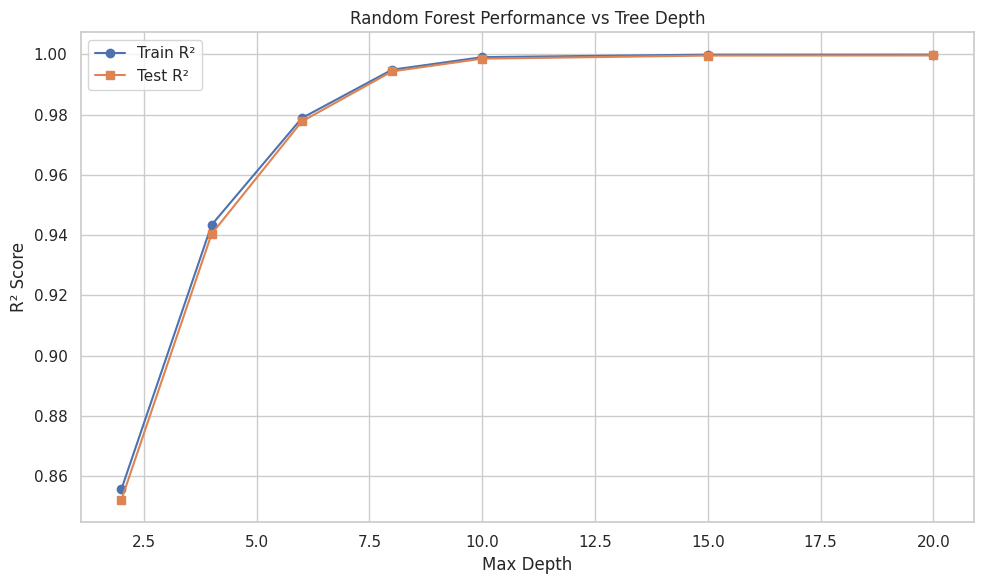

In [ ]:
depths = [2, 4, 6, 8, 10, 15, 20]  # None means unlimited depth

train_scores = []
test_scores = []

for depth in depths:
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=depth,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)

    # Predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)
    print(f"Random Forest with max_depth={depth} || Train Accuracy: {train_r2:.4f}, Test Accuracy: {test_r2:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
depth_labels = ['None' if d is None else d for d in depths]
plt.plot(depth_labels, train_scores, marker='o', label='Train R²')
plt.plot(depth_labels, test_scores, marker='s', label='Test R²')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.title('Random Forest Performance vs Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*   The best model with highest accuracy of random forest will have max_depth with value 20.
*   The best model will have testing accuracy around 99.8% and training accuracy of 99.9%.


### Model Performance Evaluation

We will now evaluate the performance of our model with the optimal max_depth value (20)

In [ ]:
# Make predictions
best_rf_model = rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        random_state=42,
        n_jobs=-1
    )
best_rf_model.fit(X_train, y_train)
rf_y_pred = best_rf_model.predict(X_test)

# Evaluation
rf_R2 = r2_score(y_test, rf_y_pred)
rf_RMSE = mean_squared_error(y_test, rf_y_pred)
rf_MAE = np.mean(np.abs(y_test - rf_y_pred))

# Print results
print(f"Random Forest R-Squared:   {rf_R2:.4f}")
print(f"Random Forest RMSE: {rf_RMSE:.4f}")
print(f"Random Forest MAE:  {rf_MAE:.4f}")

Random Forest R-Squared:   0.9997
Random Forest RMSE: 35.9667
Random Forest MAE:  1.2660


## Neural Network

### Model Training

* We will use adaboost and alsp  tune the learning rate and the hidden features with gridsearch
*   We will use RMSE to measure the loss.
*   We will train this dataset for 500 epochs.
*   We visualize the training loss wrt. epochs for the best model

In [ ]:
X = combined_df.drop(columns=["price"])
y = combined_df["price"]  # ← correct here

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Dummify X only
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Now safely convert y (this y_train is only 72k rows)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Convert to tensors
X_train_tensor = torch.from_numpy(X_train.values.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.values.reshape(-1, 1))

X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.values.reshape(-1, 1))

# Check shape
print("X_train_tensor:", X_train_tensor.shape)
print("y_train_tensor:", y_train_tensor.shape)


X_train_tensor: torch.Size([72737, 249])
y_train_tensor: torch.Size([72737, 1])


In [ ]:
class NN(torch.nn.Module):
    def __init__(self, features, hidden1):
        super(NN, self).__init__()
        self.linear1 = torch.nn.Linear(features, hidden1)
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden1, hidden1)
        self.relu2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(hidden1, 1)

    def forward(self, x):
        return self.linear3(self.relu2(self.linear2(self.relu1(self.linear1(x)))))


In [ ]:
#train the NN and tune the learning rate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_data, num_features = X_train.shape
criterion = nn.MSELoss()
best_lr = []
best_hidden = []
final_loss = []
best_loss_list = []
models = []
lr_list = [0.01, 0.05, 0.1, 0.2, 0.3]
hidden_list = [20, 30, 40]

for hidden in hidden_list:
  for lr in lr_list:
    model = NN(num_features, hidden)
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)
    training_loss_list = []
    best_lr.append(lr)
    best_hidden.append(hidden)
    for i in range(500):
        cur_epoch = i;
        optimizer.zero_grad()
        y_predicted = model(X_train_tensor)
        loss = torch.sqrt(criterion(y_predicted, y_train_tensor))
        #last iteration, append to lists
        if (i == 499):
          print("Final loss from hidden_layers {} and learning rate {}: [{}]".format(hidden, lr, loss))
          models.append(model)
          final_loss.append(loss)
        training_loss_list.append(loss.item());
        loss.backward()
        optimizer.step()
    best_loss_list.append(training_loss_list)

Final loss from hidden_layers 20 and learning rate 0.01: [108.52112579345703]
Final loss from hidden_layers 20 and learning rate 0.05: [123.88903045654297]
Final loss from hidden_layers 20 and learning rate 0.1: [331.4285583496094]
Final loss from hidden_layers 20 and learning rate 0.2: [622.0227661132812]
Final loss from hidden_layers 20 and learning rate 0.3: [582.1492919921875]
Final loss from hidden_layers 30 and learning rate 0.01: [108.3411865234375]
Final loss from hidden_layers 30 and learning rate 0.05: [108.5704345703125]
Final loss from hidden_layers 30 and learning rate 0.1: [108.72518157958984]
Final loss from hidden_layers 30 and learning rate 0.2: [622.0929565429688]
Final loss from hidden_layers 30 and learning rate 0.3: [582.186279296875]
Final loss from hidden_layers 40 and learning rate 0.01: [98.57449340820312]
Final loss from hidden_layers 40 and learning rate 0.05: [108.6827163696289]
Final loss from hidden_layers 40 and learning rate 0.1: [663.9329833984375]
Fina

The best model is with hidden layers 20 and a learning rate of 0.1. We will evaluate the model with these parameters

### Model Performance Evaluation

In [ ]:
index = 0 * 5 + 2  # = 2
best_model = models[2]
# Predict
with torch.no_grad():
    y_pred = best_model(X_test_tensor).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

# Evaluate
rmse = mean_squared_error(y_true, y_pred)
mae = np.mean(np.abs(y_true - y_pred))
r2 = r2_score(y_true, y_pred)

print("\n🔮 Neural Network Prediction Results")
print(f"Hidden Units: 20, Learning Rate: 0.1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


🔮 Neural Network Prediction Results
Hidden Units: 20, Learning Rate: 0.1
RMSE: 110467.2266
MAE: 287.8247
R² Score: -0.0003


# Best Model Selection


After extensive experimentation and model tuning, we evaluated three different predictive modeling approaches on our dataset: Lasso Regression, Random Forest, and a Neural Network. The performance of each model was measured using test set accuracy and Root Mean Squared Error (RMSE) as evaluation metrics.

- The Lasso Regression model achieved a test
accuracy of 86.63% and an RMSE of 15,322.36. While effective at feature selection, its linear nature limited its predictive power on more complex patterns.

- The Random Forest model demonstrated superior performance, achieving a test accuracy of 99.8% and an RMSE of 220.79. Its ensemble-based architecture allowed it to capture non-linear relationships in the data effectively.

- The Neural Network model, also performed poorer than Random Forest and show less accuracy.

In conclusion, the Random Forest model emerged as the most effective and accurate solution for our regression task, providing both high predictive accuracy and low error. This suggests that tree-based ensemble methods are particularly well-suited for capturing the complexities within our dataset.

# Challenges Faced

1. Dataset Choice:
Finding an interesting dataset was one of the main challenge i faced during the project as i tried different ones in the beginning and had to switch again due to 50000 rows requirement and also relevancy of the actual data.
Merging datasets from various sources—including Airbnb listings, NYC 311 complaints, weather data, and borough-level information—posed significant challenges. Each dataset came with its own schema, naming conventions, and levels of granularity. Ensuring consistent formatting, handling missing values, and aligning records temporally and geographically required extensive preprocessing.


3. Service Fee Data Inconsistencies:
A significant hurdle was the unreliability or absence of service fee data in many listings. To avoid discarding these records, we had to simulate or transform this feature intelligently—preserving variance without leaking target information or introducing bias.

4. Modeling Regularization Effects:
In regularized regression models like Ridge and Lasso, tuning the alpha hyperparameter was crucial but not always impactful without sufficient signal. In early iterations, alpha changes barely affected performance, indicating the need for better features. This led to multiple rounds of feature refinement and validation before observing meaningful model sensitivity.

6. Interpretability vs. Performance Trade-offs:
Some features (e.g., room type or borough dummies) had strong coefficients but were not always intuitive in impact due to multicollinearity. Choosing models that were interpretable while also performant required balancing regularization strength and feature selection carefully.

# Potential Next Steps

Expanding the price prediction model to all states in the United States and add housing data in order to predict the Real Estate Market as a whole.
We could also use other datasets such as Permitted Events to have a better prediction model.

In [2]:
!git clone https://github.com/MohamedDiakhate/Machine-Learning-Data-Science-Projects.git
%cd Machine-Learning-Data-Science-Projects

Cloning into 'Machine-Learning-Data-Science-Projects'...
/content/Machine-Learning-Data-Science-Projects


In [4]:
!ls /content

Machine-Learning-Data-Science-Projects	sample_data


In [5]:
%cd /content/Machine-Learning-Data-Science-Projects
!git add .
!git commit -m "Add final project notebook"
!git push origin main


/content/Machine-Learning-Data-Science-Projects
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@252c2d1f0983.(none)')
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/MohamedDiakhate/Machine-Learning-Data-Science-Projects.git'


In [6]:
%cd /content/Machine-Learning-Data-Science-Projects

/content/Machine-Learning-Data-Science-Projects


In [8]:
!git add .

In [11]:
!git commit -m "Add final project notebook"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [10]:
!git config --global user.email "diakhate.moha@gmail.com"
!git config --global user.name "Mohamed Diakhate"


In [25]:
!ssh-keygen -t ed25519 -C "diakhate.moha@gmail.com" -f ~/.ssh/id_ed25519 -N ""


Generating public/private ed25519 key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:c62jGXCdiAD+yLtTsfzvOwmAF5NTj1j3V5/c63G5joM diakhate.moha@gmail.com
The key's randomart image is:
+--[ED25519 256]--+
|  .  oo .     .  |
| . .=o + .   ...o|
|  ..o+. . . .  oo|
| ..o+. . o +    o|
|  oo.+o S + .  +.|
|   .+ .o o .  . +|
|  .. . ...o .  o |
|  ..  . o+ E .o  |
|  ..   o*o   ... |
+----[SHA256]-----+


In [26]:
!eval $(ssh-agent -s)
!ssh-add ~/.ssh/id_ed25519


Agent pid 5665
Could not open a connection to your authentication agent.


In [27]:
!cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIByKCuGmv5ggTiPKNvaVDvMk/eMKBFl74CCmsiVD7Yh8 diakhate.moha@gmail.com


In [28]:
%cd /content/Machine-Learning-Data-Science-Projects

!git remote remove origin 2>/dev/null || true
!git remote add origin git@github.com:MohamedDiakhate/Machine-Learning-Data-Science-Projects.git


/content/Machine-Learning-Data-Science-Projects


In [30]:
!ssh -T git@github.com

Host key verification failed.


In [31]:
# Make sure ~/.ssh directory exists
!mkdir -p ~/.ssh

# Add GitHub to known hosts
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts


# github.com:22 SSH-2.0-550beff


In [32]:
!ssh -T git@github.com

Hi MohamedDiakhate! You've successfully authenticated, but GitHub does not provide shell access.


In [34]:
!git push -u origin main

Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 275 bytes | 275.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:MohamedDiakhate/Machine-Learning-Data-Science-Projects.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [35]:
!git add .

In [36]:
!git commit -m "Airbnb Project"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [37]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.
Everything up-to-date


In [38]:
%cd /content/Machine-Learning-Data-Science-Projects
!ls

/content/Machine-Learning-Data-Science-Projects
README.md


In [41]:
!cp /content/Final-Project.ipynb /content/Machine-Learning-Data-Science-Projects/

cp: cannot stat '/content/Final-Project.ipynb': No such file or directory


In [44]:
!ls /content


Machine-Learning-Data-Science-Projects	sample_data


In [43]:
from google.colab import files
uploaded = files.upload()


Saving Final_Project.ipynb to Final_Project.ipynb


In [47]:
!cp /content/Final_Project.ipynb /content/Machine-Learning-Data-Science-Projects/


cp: cannot stat '/content/Final_Project.ipynb': No such file or directory


In [49]:
!pwd


/content/Machine-Learning-Data-Science-Projects


In [50]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/


Mounted at /content/drive
 521-hw10						       kaggle.json
 CIS450-Project						      'Resume (1).pdf'
'Colab Notebooks'					       Resume.pdf
'Copy of CIT593_M8_Assembly-to-C_submission_template.gsheet'   Untitled0.ipynb
 IMG_E26D0A8421AF-1.jpeg


In [51]:
!ls "/content/drive/MyDrive/Colab Notebooks"


'Another copy of Final-Project'
'Copy of Homework 1 Student Version Spring 2025.ipynb'
'Copy of HW2_Spring 2025_Student_Version (1).ipynb'
'Copy of HW2_Spring 2025_Student_Version.ipynb'
'Copy of spring25_hw4_student_version.ipynb'
'Copy of spring25_hw5_student_version.ipynb'
 Final-Project
 homework0.ipynb


In [53]:
!cp "/content/drive/MyDrive/Colab Notebooks/Final-Project" /content/Machine-Learning-Data-Science-Projects/

In [55]:
%cd /content/Machine-Learning-Data-Science-Projects
!git add Final-Project


/content/Machine-Learning-Data-Science-Projects


In [56]:
!git commit -m "Add Final Project"
!git push origin main

[main 473b34c] Add Final Project
 1 file changed, 1 insertion(+)
 create mode 100644 Final-Project
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 144.49 KiB | 782.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:MohamedDiakhate/Machine-Learning-Data-Science-Projects.git
   c9b8020..473b34c  main -> main
